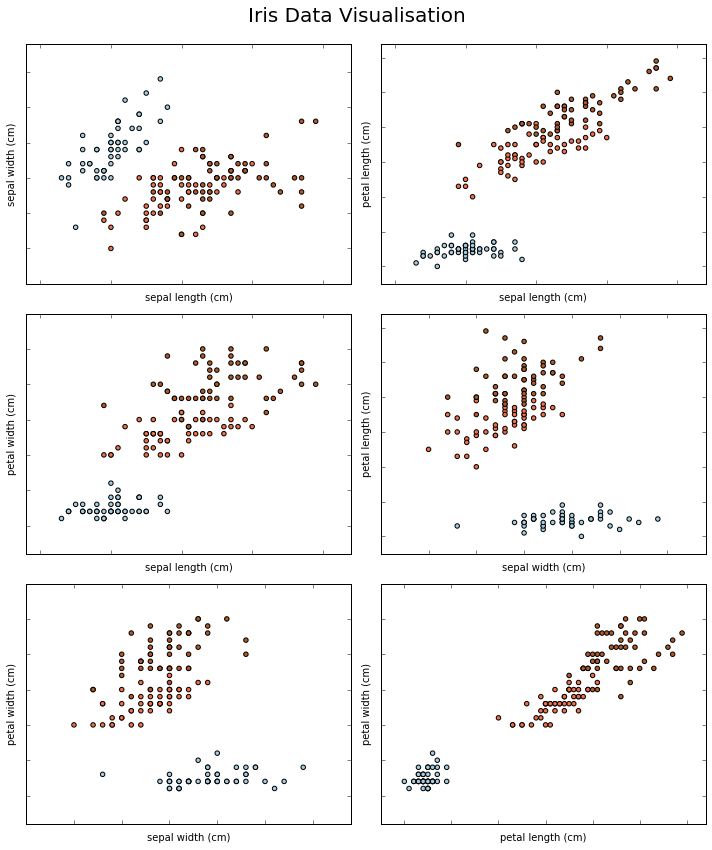

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data 
y = iris.target
features = iris.feature_names

f = plt.figure(figsize=(10,12))
gs = gridspec.GridSpec(3,2)
r,c = 0,0

for i in range(4):
    for j in range(i+1,4):
        if c == 2:
            r += 1
            c = 0
        
        x_min, x_max = X[:,i].min() - 0.5, X[:,i].max() + 0.5
        y_min, y_max = X[:,j].min() - 0.5, X[:,j].max() + 0.5
        
        ax = plt.subplot(gs[r,c])
        ax.scatter(X[:,i], X[:,j], c=y, edgecolors='k', cmap=plt.cm.Paired)
        ax.set_xlim(x_min,x_max)
        ax.set_ylim(y_min,y_max)
        ax.set_xlabel(features[i])
        ax.set_ylabel(features[j])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        f.add_subplot(ax)
        c += 1
            
f.subplots_adjust(hspace=2, wspace=1)
gs.tight_layout(f, rect=[0,0,1,0.95])
plt.suptitle('Iris Data Visualisation', fontsize=20)
plt.show()
path = r'C:\Users\Lenovo\AppData\Local\Programs\Python\Python35\iris_vis.png'
import os
if not os.path.isfile(path):
    f.savefig('iris_vis.png')

In [3]:
np.random.seed(0)
indices = np.random.permutation(len(X))
X_train = X[indices[:-10]]
y_train = y[indices[:-10]]
X_test = X[indices[-10:]]
y_test = y[indices[-10:]]

In [4]:
def make_grid(X,Y,feature,model):
      h = .02 
      model.fit(X, Y)
      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      return (Z, xx, yy)

In [5]:
def classify(model,title,filename):
      features = iris['feature_names']
      f = plt.figure(figsize=(10,12))
      gs = gridspec.GridSpec(3,2)
      r,c = 0,0
      acc = [[],[]]

      for i in range(4):
            for j in range(i+1,4):
            
                  x = np.stack((X_train[:,i],X_train[:,j]),axis = 1)
                  (Z, xx, yy) = make_grid(x,y_train,[features[i],features[j]],model)
            
                  model.fit(x, y_train)
                  z = model.predict(x)
                  acc[0].append(accuracy_score(z, y_train))
            
                  xt = np.stack((X_test[:,i],X_test[:,j]),axis = 1)
                  z = model.predict(xt)
                  acc[1].append(accuracy_score(z, y_test))
            
                  if c == 2:
                        r += 1
                        c = 0

                  ax = plt.subplot(gs[r,c])
                  ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
                  ax.scatter(x[:,0], x[:,1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
                  ax.set_xlim(xx.min(), xx.max())
                  ax.set_ylim(yy.min(), yy.max())
                  ax.set_xlabel(features[i])
                  ax.set_ylabel(features[j])
                  ax.set_xticklabels([])
                  ax.set_yticklabels([])
                  f.add_subplot(ax)
                  c += 1
            
      f.subplots_adjust(hspace=2, wspace=1)
      gs.tight_layout(f, rect=[0,0,1,0.95])
      plt.suptitle(title, fontsize=20)
      plt.show()
      path = r'C:\Users\Lenovo\AppData\Local\Programs\Python\Python35\%s'%(filename)
      import os
      if not os.path.isfile(path):
            f.savefig(filename)

      error = [sum(acc[i])/len(acc[i]) *100 for i in range(2)]
      print(model)
      print('Error rate for training data : %d%%'%(error[0]))
      print('Error rate for testing data : %d%%\n'%(error[1]))
      stats.update({title:error})
    

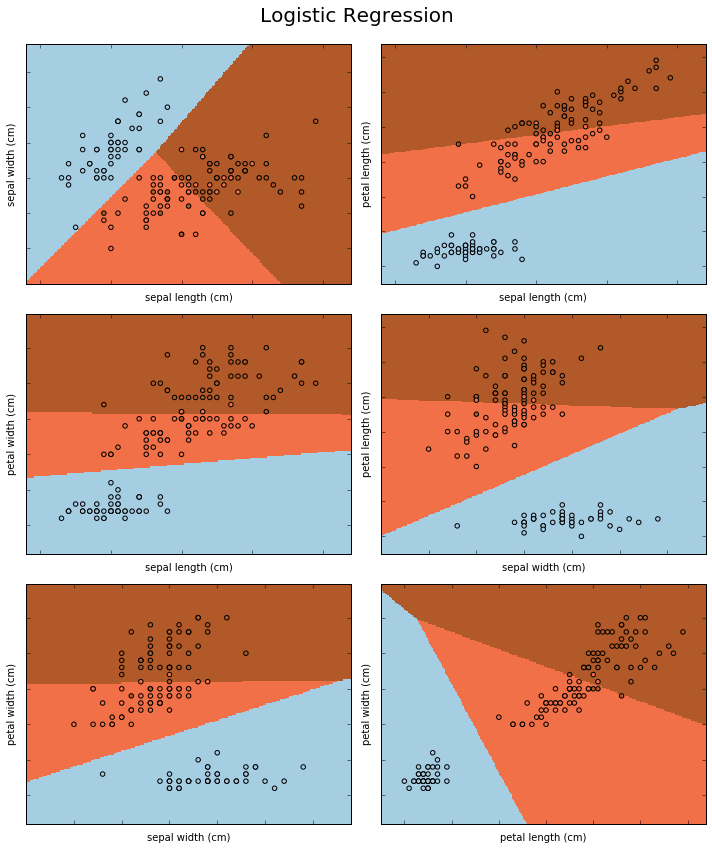

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Error rate for training data : 93%
Error rate for testing data : 90%



In [8]:
from sklearn.metrics import accuracy_score
stats = {}

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1e5)
title = 'Logistic Regression'
filename = 'iris_logreg.png'
classify(model,title,filename)



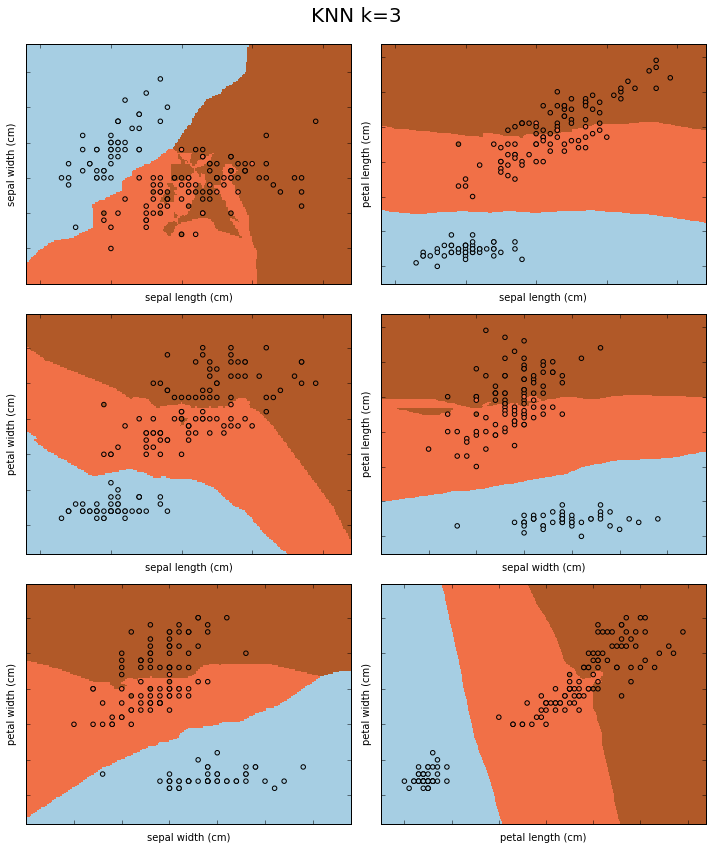

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Error rate for training data : 94%
Error rate for testing data : 91%



In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
title = 'KNN k=3'
filename = 'iris_knn3.png'
classify(model,title,filename)



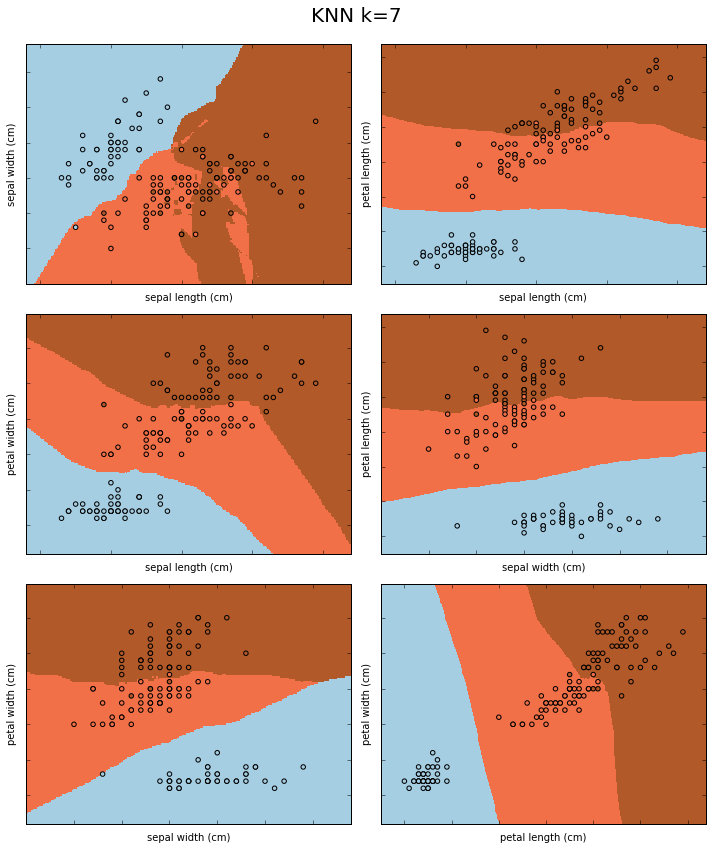

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
Error rate for training data : 93%
Error rate for testing data : 91%



In [10]:
model = KNeighborsClassifier(n_neighbors=7)
title = 'KNN k=7'
filename = 'iris_knn7.png'
classify(model,title,filename)

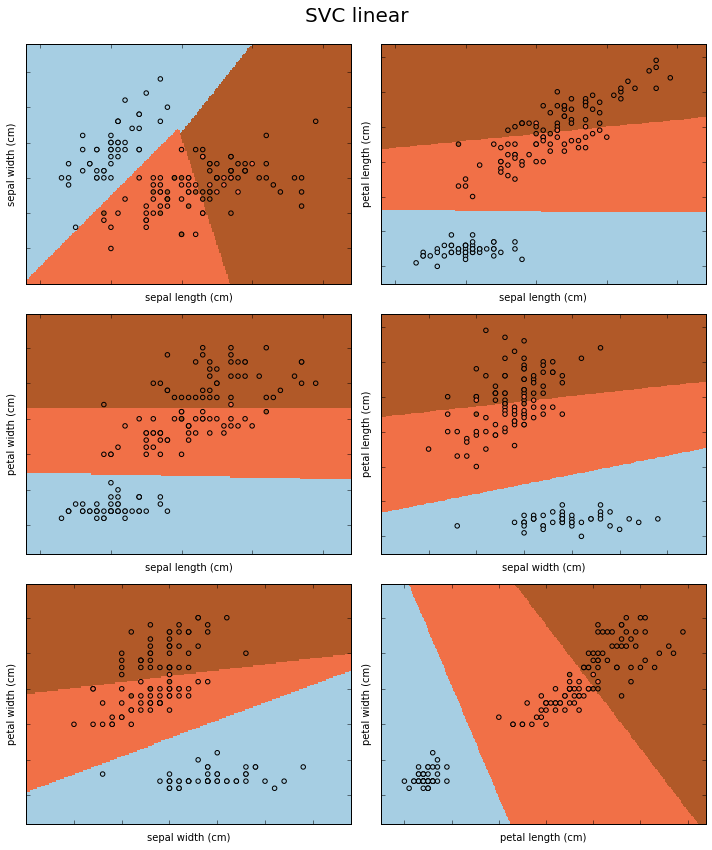

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Error rate for training data : 94%
Error rate for testing data : 93%



In [11]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0)
title = 'SVC linear'
filename = 'iris_svm_linear.png'
classify(model,title,filename)

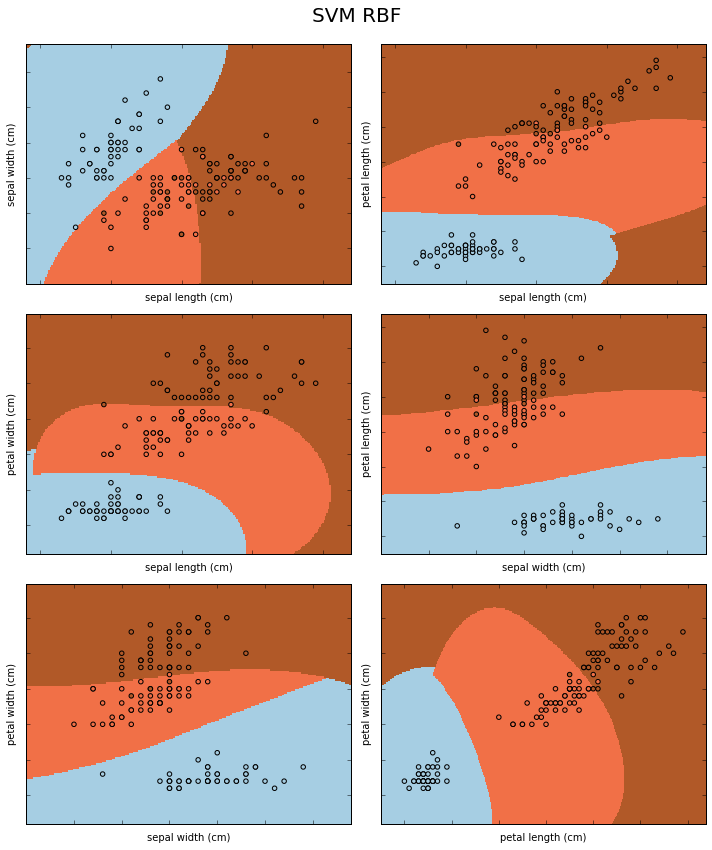

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Error rate for training data : 93%
Error rate for testing data : 91%



In [12]:
model = SVC(kernel='rbf', gamma=0.7, C=1.0)
title = 'SVM RBF'
filename = 'iris_svm_rbf.png'
classify(model,title,filename)

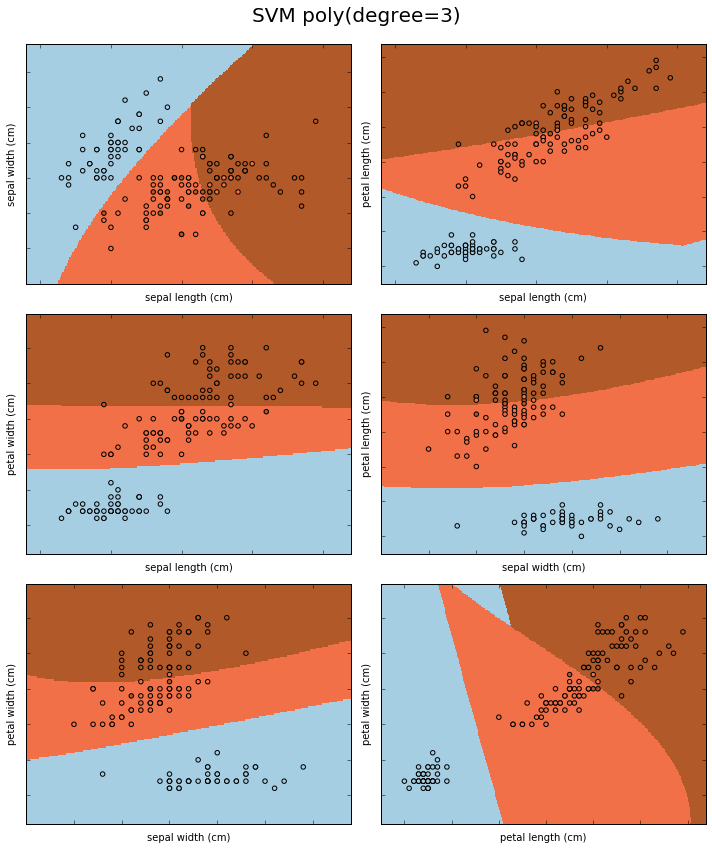

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Error rate for training data : 93%
Error rate for testing data : 93%



In [13]:
model = SVC(kernel='poly', degree=3, C=1.0)
title = 'SVM poly(degree=3)'
filename = 'iris_svm_poly.png'
classify(model,title,filename)

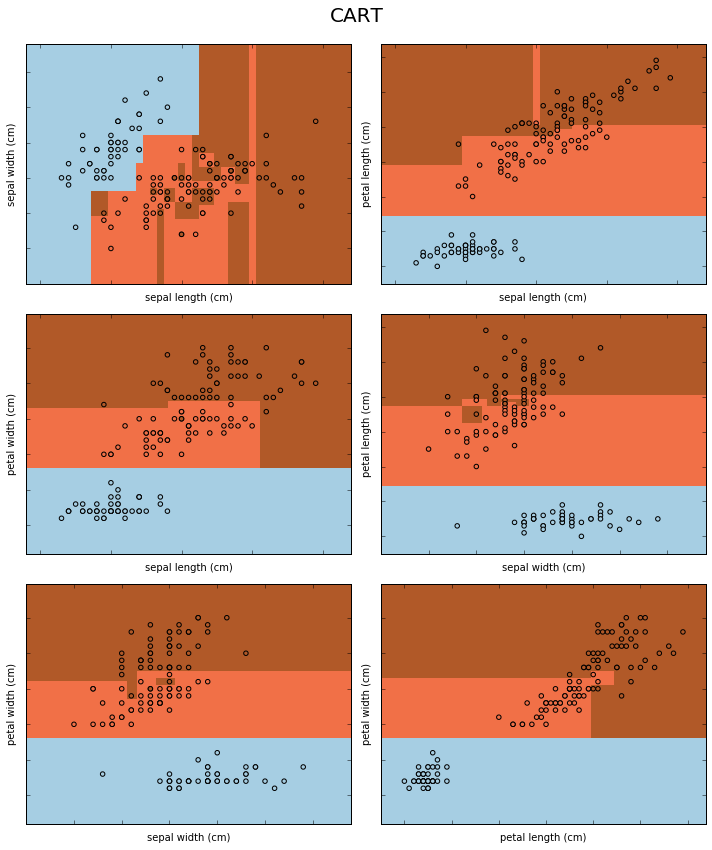

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Error rate for training data : 97%
Error rate for testing data : 88%



In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
title = 'CART'
filename = 'iris_cart.png'
classify(model,title,filename)

In [15]:
k, v = list(stats.keys()), np.asarray(list(stats.values()))
stat = pd.DataFrame({'Classifiers':k, 'Training Accuracy':v[:,0], 'Testing Accuracy':v[:,1]})
print(stat)

           Classifiers  Testing Accuracy  Training Accuracy
0              KNN k=7         91.666667          93.214286
1              SVM RBF         91.666667          93.809524
2                 CART         88.333333          97.857143
3   SVM poly(degree=3)         93.333333          93.928571
4           SVC linear         93.333333          94.047619
5              KNN k=3         91.666667          94.404762
6  Logistic Regression         90.000000          93.333333


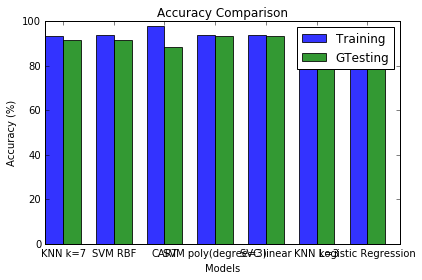

In [16]:
n_groups = 7
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, v[:,0], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Training')
 
rects2 = plt.bar(index + bar_width, v[:,1], bar_width,
                 alpha=opacity,
                 color='g',
                 label='GTesting')
 
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison')
plt.xticks(index + bar_width, k)
plt.legend()
 
plt.tight_layout()
plt.show()